### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [5]:
data = pd.read_csv('coupons.csv')

In [6]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1.0,0.0,0.0,0.0,1.0,1.0
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1.0,0.0,0.0,0.0,1.0,0.0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1.0,1.0,0.0,0.0,1.0,1.0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1.0,1.0,0.0,0.0,1.0,0.0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1.0,1.0,0.0,0.0,1.0,0.0


2. Investigate the dataset for missing or problematic data.

In [7]:
data.isnull().sum()

destination                0
passanger                  0
weather                    0
temperature                0
time                       0
coupon                     0
expiration                 0
gender                     0
age                        0
maritalStatus              0
has_children               0
education                  0
occupation                 0
income                     0
car                     6115
Bar                       64
CoffeeHouse              107
CarryAway                107
RestaurantLessThan20     109
Restaurant20To50          86
toCoupon_GEQ5min           1
toCoupon_GEQ15min          1
toCoupon_GEQ25min          1
direction_same             1
direction_opp              1
Y                          1
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [14]:
#Removing car column due to all rows being null
data['car'].head()
cp = data.drop(['car'], axis=1)

#Replace all nevers and nulls with 0 for Bar, CarryAway, RestaurantLessThan20, CoffeeHouse, and Restaurant20To50
data['Bar'].fillna(0, inplace=True)
data['Bar'].replace('never', 0, inplace=True)
data['Bar'].head()

data['CarryAway'].fillna(0, inplace=True)
data['CarryAway'].head()

data['RestaurantLessThan20'].head()
data['RestaurantLessThan20'].fillna(0,inplace=True)
data['RestaurantLessThan20'].head()

data['CoffeeHouse'].fillna(0, inplace=True)
data['CoffeeHouse'].replace('never', 0, inplace=True)

data['Restaurant20To50'].dropna()
data['Restaurant20To50'].fillna(0, inplace=True)
data['Restaurant20To50'].replace('never', 0, inplace=True)

cp.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        1
toCoupon_GEQ15min       1
toCoupon_GEQ25min       1
direction_same          1
direction_opp           1
Y                       1
dtype: int64

4. What proportion of the total observations chose to accept the coupon?



In [15]:
accept_coupon = len(cp[cp['Y'] != 0])
proportion = accept_coupon/ len(cp['Y'])
print(proportion)

0.5815533980582525


5. Use a bar plot to visualize the `coupon` column.

[Text(0, 0, 'Restaurant(<20)'),
 Text(1, 0, 'Coffee House'),
 Text(2, 0, 'Carry out & Take away'),
 Text(3, 0, 'Bar'),
 Text(4, 0, 'Restaurant(20-50)')]

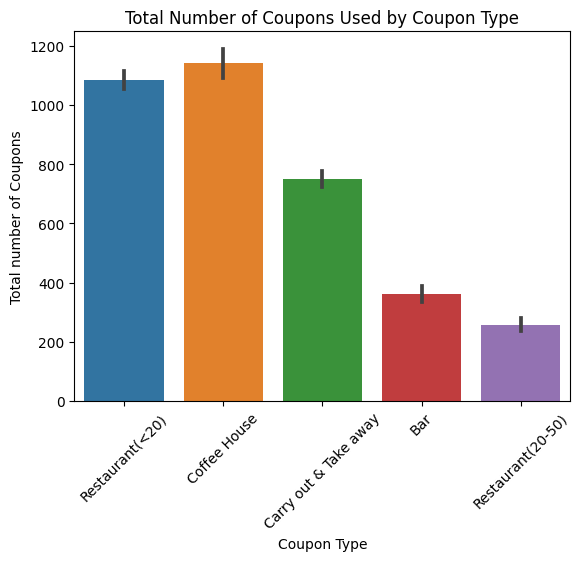

In [16]:
ax = sns.barplot(cp, x='coupon', y='Y', estimator='sum', )
ax.set(xlabel='Coupon Type', ylabel='Total number of Coupons', title='Total Number of Coupons Used by Coupon Type')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)


6. Use a histogram to visualize the temperature column.

[Text(0.5, 0, 'Temperature'),
 Text(0, 0.5, 'Total Amount'),
 Text(0.5, 1.0, 'Total Count by Each Temperature')]

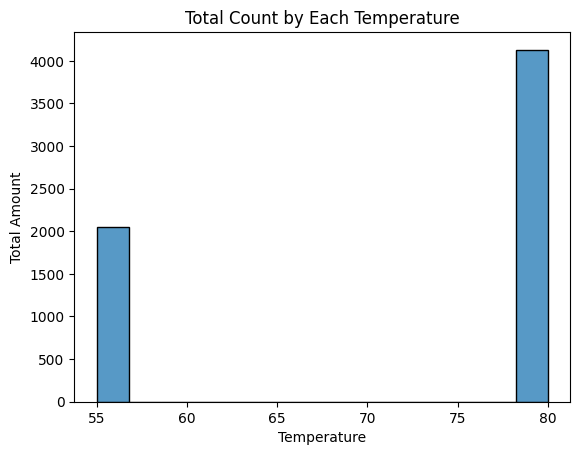

In [17]:
plt = sns.histplot(cp, x='temperature')
plt.set(xlabel='Temperature', ylabel='Total Amount', title='Total Count by Each Temperature')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [13]:
df = cp[['Bar', 'coupon', 'Y']]
print(df)

        Bar                 coupon    Y
0     never        Restaurant(<20)  1.0
1     never           Coffee House  0.0
2     never  Carry out & Take away  1.0
3     never           Coffee House  0.0
4     never           Coffee House  0.0
...     ...                    ...  ...
6175  never           Coffee House  1.0
6176  never      Restaurant(20-50)  1.0
6177  never           Coffee House  1.0
6178  never           Coffee House  1.0
6179  never        Restaurant(<20)  NaN

[6180 rows x 3 columns]


2. What proportion of bar coupons were accepted?


In [19]:
accepted_coupons = df[(df['Bar'] != 0) & (df['Y'] == 1)]['Bar'].shape[0]
proportion_of_accepted = accepted_coupons/df.shape[0]
print(proportion_of_accepted)

0.5813915857605177


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [20]:
#Filtering out
less_than_3 = df[(df['Bar'] == 'less1') | (df['Bar'] == '1~3') | (df['Bar'] == '0') & (df['Y'] == 1)].shape[0]
less_than_3_acceptance = less_than_3/df.shape[0]
print(less_than_3_acceptance)
more_than_3_acceptance = 1 - less_than_3_acceptance
print(more_than_3_acceptance)

0.4519417475728155
0.5480582524271844


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [23]:
df_age = cp[['Bar', 'coupon', 'age', 'Y']]
df_age['age'].replace('50plus', 50, inplace=True)
df_age['age'].replace('below21', 20, inplace=True)

more_than_once_month = df_age[((df_age['Bar'] != 'less1') | (df_age['Bar'] != '0')) & (df_age['age'].astype(int) >= 25) & (df_age['Y'] == 1)].shape[0]
more_than_once_month_acceptance = more_than_once_month/df.shape[0]
print(more_than_once_month_acceptance)
less_than_once_acceptance = 1 - more_than_once_month_acceptance
print(less_than_once_acceptance)


0.4184466019417476
0.5815533980582523


<ipython-input-23-9b01657c043f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['age'].replace('50plus', 50, inplace=True)
<ipython-input-23-9b01657c043f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['age'].replace('below21', 20, inplace=True)


The acceptance rate for those who got to a bar more than once and are over the age of 25 is much higher than those who went less times. This makes sense since those that go more often will be more likely to take advantage of a coupon to get a better price.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [24]:
df_pass_occ = cp[['Bar', 'coupon', 'passanger', 'occupation', 'Y']]
more_than_once_pass_occ = df_pass_occ[((df_pass_occ['Bar'] != 'less1') | (df_pass_occ['Bar'] != '0')) & (df_pass_occ['passanger'] != 'Kid(s)') & (df_pass_occ['occupation'] != 'Farming Fishing & Forestry') & (df_pass_occ['Y'] == 1)]
more_than_once_pass_occ_rate = more_than_once_pass_occ.shape[0] / df_pass_occ.shape[0]
print(more_than_once_pass_occ_rate)
less_than_once_pass_occ_rate = 1 - more_than_once_pass_occ_rate
print(less_than_once_pass_occ_rate)

0.5364077669902912
0.46359223300970875


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [25]:
df_ = cp[['age', 'Bar', 'coupon', 'passanger', 'occupation', 'maritalStatus', 'income', 'RestaurantLessThan20', 'Y']]
more_than_once_pass_marital = df_[((df_['Bar'] != 'less1') | (df_['Bar'] != '0') & (df_['passanger'] != 'Kid(s)') & (df_['maritalStatus'] != 'Widowed') & (df_['Y'] == 1))]
more_than_once_under_age = df_[((df_['Bar'] != 'less1') | (df_['Bar'] != '0')) & ((df_['age'] == '21') | (df_['age'] == 'below21') | (df_['age'] == '26') & (df_['Y'] == 1))]
cheap_rest_income = df_[((df_['RestaurantLessThan20'] == '4~8') | (df_['RestaurantLessThan20'] == 'gt8')) | (df_['income'] == '$37500 - $49999') & (df_['Y'] == 1)]
more_than_once_pass_marital_rate = more_than_once_pass_marital.shape[0] / df_.shape[0]
more_than_once_under_age_rate = more_than_once_under_age.shape[0] / df_.shape[0]
cheap_rest_income_rate = cheap_rest_income.shape[0] / df_.shape[0]

print(more_than_once_pass_marital_rate)
print(more_than_once_under_age_rate)
print(cheap_rest_income_rate)

0.8720064724919094
0.3953074433656958
0.4540453074433657


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

I hypothesize that a majority of who accepted the bar coupon are primairly older than 30 and do not have children and are not married.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Exploring Take Out Coupons and characteristics of those who accept the coupon

1. What are the acceptance rates of those who take out food more than 4 times a month and go to cheap
restaurants more than 4 times a month
2. What are the acceptance rates of those who take out food 1 or less times a month and are married
3. What are the acceptance rates of those who take out food more than one time a month and have no passengers and are single

In [27]:
df_takeout = cp[['age', 'CarryAway', 'coupon', 'passanger', 'occupation', 'maritalStatus', 'income', 'RestaurantLessThan20', 'Y']]

In [33]:
#1.
take_out_cheap = df_takeout[((df_takeout['CarryAway'] == '4-8') | (df_takeout['CarryAway'] == 'gt8')) & ((df_takeout['RestaurantLessThan20'] == '4-8') | (df_takeout['RestaurantLessThan20'] == 'gt8')) & (df_takeout['Y'] == 1)]
take_out_cheap_rate = take_out_cheap.shape[0]/df_takeout.shape[0]
print(take_out_cheap_rate)

[0 '4~8' '1~3' 'gt8' 'less1' 'never' 'less']
0.025728155339805825


In [37]:
#2.
take_out_less_married = df_takeout[((df_takeout['CarryAway'] == '1') | (df_takeout['CarryAway'] == '0')) & ((df_takeout['maritalStatus'] == 'Married')) & (df_takeout['Y'] == 1)]
take_out_cheap_rate = take_out_less_married.shape[0]/df_takeout.shape[0]
print(take_out_cheap_rate)

0.0


In [42]:
#3.
print(df_takeout['passanger'].unique())
take_out_more_month_no = df_takeout[((df_takeout['CarryAway'] == '1') | (df_takeout['CarryAway'] == '1-3') | (df_takeout['CarryAway'] == '4-8') | (df_takeout['CarryAway'] == 'gt8')) & (df_takeout['maritalStatus'] == 'Single') & (df_takeout['passanger'] == "Alone") & (df_takeout['Y'] == 1)]
take_out_cheap_rate = take_out_more_month_no.shape[0]/df_takeout.shape[0]
print(take_out_cheap_rate)

['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
0.02459546925566343


Based on the above rates, we can tell that the acceptance rate for single and cheap restaurants is quite low. For instance, people who go to a cheap restaurant may not feel the need to use a coupon since it is already pretty affordable. Interestingly, single people were lower in using the coupon for take out which could a have a few implicaitons. One that there weren't enough single people in the survey. Or that majority single people do not do carryout from the restaurants surveyed.